In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
np.random.seed(42)

# Number of customers
n = 1000

# Simulate dataset
df = pd.DataFrame({
    'customer_id': np.arange(1, n + 1),
    'plan_type': np.random.choice(['prepaid', 'postpaid'], size=n, p=[0.7, 0.3]),
    'calls_per_day': np.random.poisson(lam=8, size=n),
    'data_usage_gb': np.round(np.random.normal(loc=2.5, scale=1.0, size=n), 2),
    'device_change_count': np.random.poisson(lam=1, size=n),
    'location_change_count': np.random.poisson(lam=2, size=n)
})

# Ensure non-negative data usage
df['data_usage_gb'] = df['data_usage_gb'].clip(lower=0)

# Create fraud label based on suspicious conditions
df['fraud_label'] = np.where(
    (df['device_change_count'] > 3) |
    (df['location_change_count'] > 5) |
    ((df['plan_type'] == 'prepaid') & (df['data_usage_gb'] < 0.5)),
    1, 0
)

print("Sample data:")
print(df.head())


In [ ]:
# Randomly introduce some missing values
for col in ['calls_per_day', 'data_usage_gb']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

# Fill missing numeric values with median
df['calls_per_day'].fillna(df['calls_per_day'].median(), inplace=True)
df['data_usage_gb'].fillna(df['data_usage_gb'].median(), inplace=True)

# Fill categorical missing values with mode (if any)
df['plan_type'].fillna(df['plan_type'].mode()[0], inplace=True)


In [ ]:
# Select numeric columns to scale
numeric_cols = ['calls_per_day', 'data_usage_gb', 'device_change_count', 'location_change_count']

# Initialize and apply scaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nAfter scaling:")
print(df.head())


In [ ]:
# Create derived features
df['avg_data_usage_per_day'] = df['data_usage_gb']  # already daily avg in this dataset
df['location_to_call_ratio'] = np.where(df['calls_per_day'] != 0,
                                        df['location_change_count'] / df['calls_per_day'], 0)
df['device_changes_per_week'] = df['device_change_count'] / 4  # assume 1 month = 4 weeks

print("\nAfter feature engineering:")
print(df[['customer_id', 'avg_data_usage_per_day', 'location_to_call_ratio', 'device_changes_per_week']].head())


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np

# Step 1: Set seed for reproducibility
np.random.seed(42)

# Step 2: Create synthetic dataset
n = 100  # number of customers

df = pd.DataFrame({
    'customer_id': range(1, n + 1),
    'plan_type': np.random.choice(['Basic', 'Standard', 'Premium'], size=n, p=[0.4, 0.4, 0.2]),
    'calls_per_day': np.random.normal(loc=10, scale=3, size=n).round(1),
    'data_usage_gb': np.random.normal(loc=2.5, scale=1, size=n).round(2),
    'device_change_count': np.random.poisson(lam=1.5, size=n),
    'location_change_count': np.random.poisson(lam=0.8, size=n),
    'fraud_label': np.random.choice([0, 1], size=n, p=[0.85, 0.15])
})

# Step 3: Introduce missing values randomly
for col in ['calls_per_day', 'data_usage_gb', 'device_change_count', 'location_change_count']:
    df.loc[df.sample(frac=0.1, random_state=np.random.randint(100)).index, col] = np.nan

# Step 4: Display
print(df.head(15))
print("\nMissing values summary:\n", df.isna().sum())


    customer_id plan_type  calls_per_day  data_usage_gb  device_change_count  \
0             1     Basic           10.3            NaN                  0.0   
1             2   Premium            9.1           3.95                  1.0   
2             3  Standard           10.3           2.24                  3.0   
3             4  Standard            4.0            NaN                  2.0   
4             5     Basic            9.3           3.13                  NaN   
5             6     Basic           11.1           1.64                  0.0   
6             7     Basic           14.4           1.43                  0.0   
7             8   Premium            NaN           2.98                  0.0   
8             9  Standard            7.6            NaN                  NaN   
9            10  Standard            8.5           3.21                  1.0   
10           11     Basic           12.7           2.97                  2.0   
11           12   Premium           11.0

In [3]:
# 1. Check which columsn are having teh missing values - check 
# 2. Impute missing values
# 3. Do encoding for the categorical variable
# 4. Then do the standard scalar for the numeric values

In [4]:
# -------------------------------------------------------
# 1. Check missing values
# -------------------------------------------------------
print("Missing Value Percentage per column:\n", df.isna().mean() * 100, "\n")

Missing Value Percentage per column:
 customer_id               0.0
plan_type                 0.0
calls_per_day            10.0
data_usage_gb            10.0
device_change_count      10.0
location_change_count    10.0
fraud_label               0.0
dtype: float64 



In [5]:
num_cols = ['calls_per_day', 'data_usage_gb', 'device_change_count', 'location_change_count']

# Summary stats
print(df[num_cols].describe())


       calls_per_day  data_usage_gb  device_change_count  \
count      90.000000      90.000000            90.000000   
mean        9.945556       2.539889             1.477778   
std         2.821911       1.099776             1.455156   
min         4.000000      -0.740000             0.000000   
25%         7.700000       1.740000             0.000000   
50%        10.200000       2.605000             1.000000   
75%        11.475000       3.205000             2.000000   
max        17.400000       6.350000             8.000000   

       location_change_count  
count              90.000000  
mean                0.755556  
std                 0.811589  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 1.000000  
max                 3.000000  


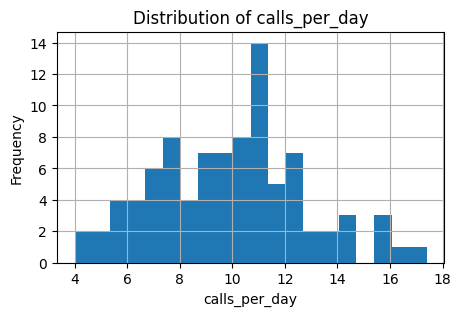

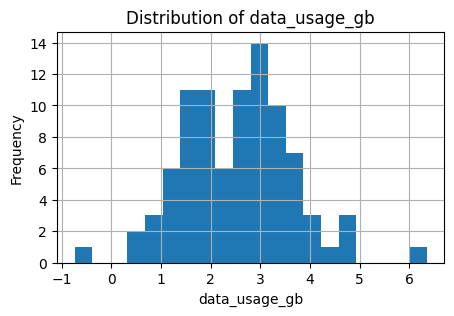

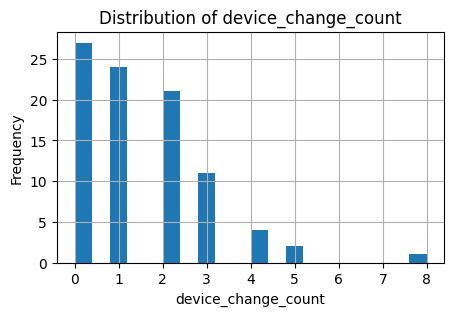

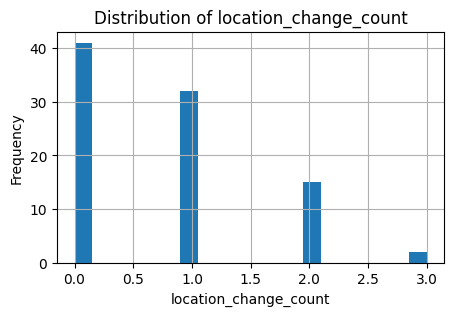

In [6]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(5,3))
    df[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


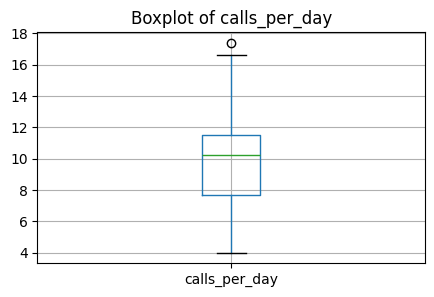

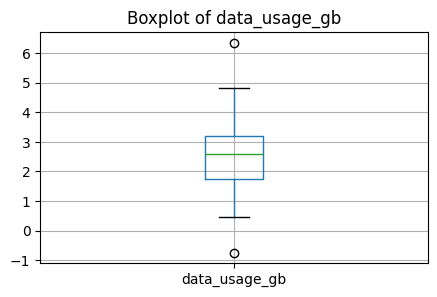

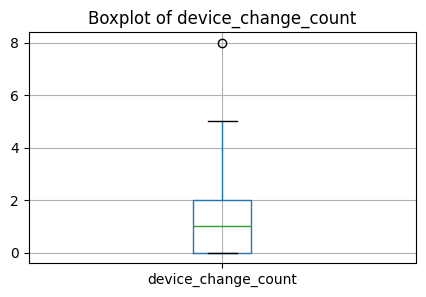

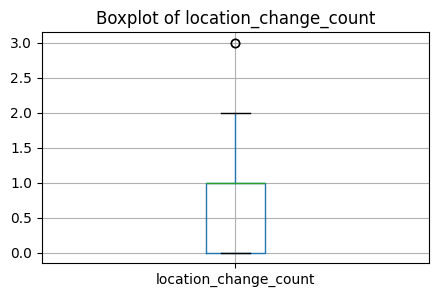

In [7]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [8]:

# Numerical columns
num_cols = ['calls_per_day', 'data_usage_gb', 'device_change_count', 'location_change_count']
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Categorical column
df['plan_type'].fillna(df['plan_type'].mode()[0], inplace=True)

print("Missing values after imputation:\n", df.isna().sum(), "\n")

# -------------------------------------------------------
# 3. Encode categorical columns
# -------------------------------------------------------
label_encoder = LabelEncoder()
df['plan_type_encoded'] = label_encoder.fit_transform(df['plan_type'])

Missing values after imputation:
 customer_id              0
plan_type                0
calls_per_day            0
data_usage_gb            0
device_change_count      0
location_change_count    0
fraud_label              0
dtype: int64 



/tmp/ipykernel_2670940/192932080.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_2670940/192932080.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [9]:
# -------------------------------------------------------
# 4. Handle outliers (optional)
# -------------------------------------------------------
# Example: Cap extreme values at 99th percentile for numeric columns
for col in num_cols:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [10]:


# -------------------------------------------------------
# 5. Feature correlation check (optional)
# -------------------------------------------------------
print("Correlation matrix:\n", df[num_cols + ['fraud_label']].corr(), "\n")

# -------------------------------------------------------
# 6. Scale numeric columns
# -------------------------------------------------------
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# -------------------------------------------------------
# 7. Split into train-test sets (for model building)
# -------------------------------------------------------
X = df_scaled[['plan_type_encoded'] + num_cols]
y = df_scaled['fraud_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# -------------------------------------------------------
# Optional: preview cleaned dataset
# -------------------------------------------------------
print("\nCleaned and Prepared Data Sample:\n", df_scaled.head())

Correlation matrix:
                        calls_per_day  data_usage_gb  device_change_count  \
calls_per_day               1.000000       0.083890            -0.001797   
data_usage_gb               0.083890       1.000000            -0.106931   
device_change_count        -0.001797      -0.106931             1.000000   
location_change_count      -0.210697      -0.011721            -0.012258   
fraud_label                -0.076294       0.134619             0.046163   

                       location_change_count  fraud_label  
calls_per_day                      -0.210697    -0.076294  
data_usage_gb                      -0.011721     0.134619  
device_change_count                -0.012258     0.046163  
location_change_count               1.000000     0.129448  
fraud_label                         0.129448     1.000000   

Train shape: (80, 5)
Test shape: (20, 5)

Cleaned and Prepared Data Sample:
    customer_id plan_type  calls_per_day  data_usage_gb  device_change_count  \
0   

In [11]:
# -------------------------------------------------------
# 2. Feature Engineering
# -------------------------------------------------------

# 1. Average data usage per day
df['avg_data_usage_per_day'] = df['data_usage_gb'] / 30

# 2. Ratio of location changes to call count
df['loc_change_to_calls_ratio'] = df['location_change_count'] / (df['calls_per_day'] + 1)

# 3. Number of device changes per week
df['device_change_per_week'] = df['device_change_count'] / 4

# Check new columns
print(df[['avg_data_usage_per_day', 'loc_change_to_calls_ratio', 'device_change_per_week']].head())


   avg_data_usage_per_day  loc_change_to_calls_ratio  device_change_per_week
0                0.086833                   0.088496                    0.00
1                0.131667                   0.198020                    0.25
2                0.074667                   0.176991                    0.75
3                0.086833                   0.000000                    0.50
4                0.104333                   0.194175                    0.25


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('fraud_label', axis=1)
y = df['fraud_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight='balanced',  # Automatically adjusts weights
    random_state=42
)


ValueError: could not convert string to float: 'Basic'

In [19]:
X_train.dtypes

customer_id                    int64
plan_type                     object
calls_per_day                float64
data_usage_gb                float64
device_change_count          float64
location_change_count        float64
plan_type_encoded              int64
avg_data_usage_per_day       float64
loc_change_to_calls_ratio    float64
device_change_per_week       float64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['plan_type'] = le.fit_transform(X_train['plan_type'])
X_test['plan_type'] = le.transform(X_test['plan_type'])


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # Handles imbalance
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]),  # balance classes
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[16  1]
 [ 3  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.00      0.00      0.00         3

    accuracy                           0.80        20
   macro avg       0.42      0.47      0.44        20
weighted avg       0.72      0.80      0.76        20


ROC-AUC Score: 0.6666666666666666


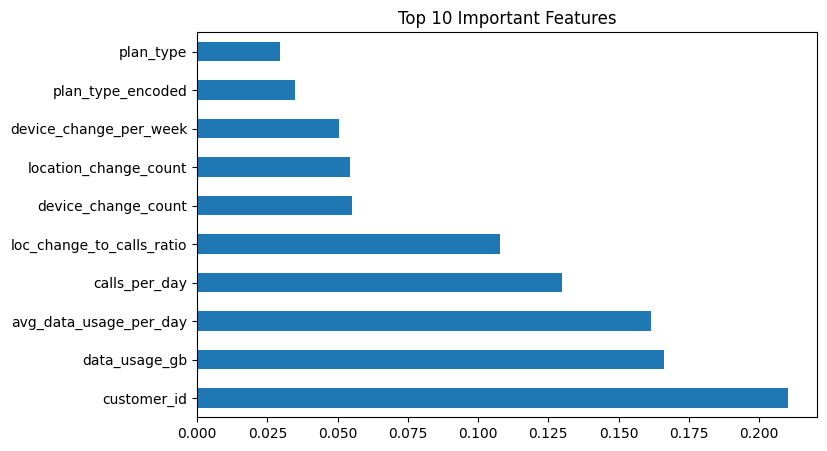

In [24]:
import matplotlib.pyplot as plt
import numpy as np

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()


/tmp/ipykernel_2670940/1076738873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


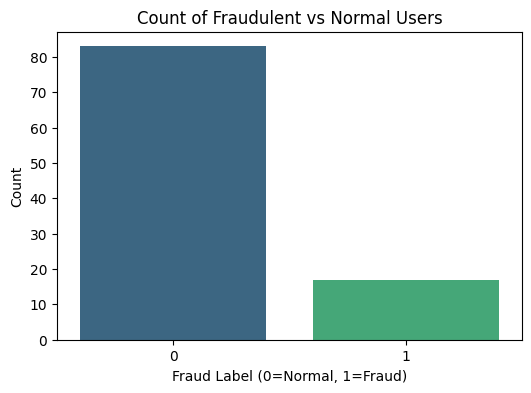

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='viridis')
plt.title("Count of Fraudulent vs Normal Users")
plt.xlabel("Fraud Label (0=Normal, 1=Fraud)")
plt.ylabel("Count")
plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le


In [28]:
for col, le in label_encoders.items():
    X[col] = le.transform(X[col])


In [30]:
X = X.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)


In [31]:
# Get predicted probabilities for the positive class (fraud = 1)
df['fraud_probability'] = rf.predict_proba(X)[:, 1]


In [32]:
def assign_risk(score):
    if score < 0.3:
        return 'Low Risk'
    elif score < 0.7:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['risk_level'] = df['fraud_probability'].apply(assign_risk)


In [33]:
df['risk_level'].value_counts()


risk_level
Low Risk       81
Medium Risk    14
High Risk       5
Name: count, dtype: int64